In [19]:
#Import statements
import sys
sys.path.insert(0,'..')
import torch, torch.nn as nn
import torch.nn.utils.rnn as rnn_utils
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
import numpy
import utils.workspace as ws
from utils.workspace import normalize
from unconditional_generation.generate_unconditionnally import LSTM as lstm

In [32]:
from conditional_generation.generate_conditionnally import LSTM as lstm

In [20]:
from utils import plot_stroke

In [33]:
experiment_directory = "../conditional_generation/"
specs = ws.load_experiment_specifications(experiment_directory)

In [3]:
# net_specs = specs["NetworkSpecs"]
# input_dim = net_specs["InputDim"]
# hidden_dim = net_specs["HiddenDim"]
# n_layers = net_specs["NumLayersLSTM"]
# output_dim = net_specs["OutputDim"]
# dropout = net_specs["Dropout"]
# model = lstm(input_dim=input_dim, hidden_dim=hidden_dim, n_layers=n_layers, output_dim=output_dim, dropout=dropout, )

In [35]:
net_specs = specs["NetworkSpecs"]
input_dim = net_specs["InputDim"]
hidden_dim = net_specs["HiddenDim"]
n_layers = net_specs["NumLayersLSTM"]
output_dim = net_specs["OutputDim"]
dropout = net_specs["Dropout"]
model = lstm(input_dim=input_dim, hidden_dim=h dden_dim, n_layers=n_layers, output_dim=output_dim,char_to_int=char_to_int)

TypeError: __init__() missing 1 required positional argument: 'window_parameter_dim'

In [ ]:
window_prameter_dim

In [38]:
net_specs = specs["NetworkSpecs"]
input_dim = net_specs["InputDim"]
hidden_dim = net_specs["HiddenDim"]
n_layers = net_specs["NumLayersLSTM"]
output_dim = net_specs["OutputDim"]
window_parameter_dim = net_specs["WindowParameterDim"]
model = lstm(input_dim=input_dim, hidden_dim=hidden_dim, n_layers=n_layers, output_dim=output_dim, window_parameter_dim=window_parameter_dim, char_to_int=char_to_int)

In [40]:
model.load_model_parameters(os.path.join("..", specs['ModelDir']), "latest")

10

In [5]:
model = model.cuda()

In [41]:
torch.save(model, "../conditional_generation/cgm.pt")

/home/user/anaconda3/envs/deepsdf/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTMCell. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [14]:
# experiment_directory = "../unconditional_generation/"
# specs = ws.load_experiment_specifications(experiment_directory)

In [15]:
def generate_stroke(model):
    model.eval()
    stroke_length = np.random.randint(specs["eval"]["StrokeMinLength"], specs["eval"]["StrokeMaxLength"]+1)
    batch_size = 1
    stroke = torch.zeros(stroke_length, batch_size, 3)
    hidden = model.init_hidden(batch_size)
    point = torch.Tensor([[[1,0,0]]]).cuda()
    # Randomize Length of stroke with random seed
    for k in range(stroke_length):
        model.eval()

        point, hidden = model(point,hidden)
        point[:, 0] = torch.sigmoid(point[:, 0])
#         point[:, 0] = torch.Tensor([1 if x > 0.2 else 0 for x in point[:, 0]])
        point[:, 0] = torch.Tensor(np.random.binomial(1,point[:, 0].data.cpu().numpy()))
        stroke[k] = point
        point = point.unsqueeze(0)
    return np.array(stroke.squeeze().data)

In [16]:
stroke = generate_stroke(model)

In [17]:
stroke

array([[ 0.        ,  0.5487576 ,  0.7010766 ],
       [ 0.        ,  0.10528801,  0.17847246],
       [ 0.        ,  0.15834813,  0.08058229],
       ...,
       [ 0.        , -0.07291905, -0.00182631],
       [ 0.        , -0.07292171, -0.00181094],
       [ 0.        , -0.07292479, -0.00179795]], dtype=float32)

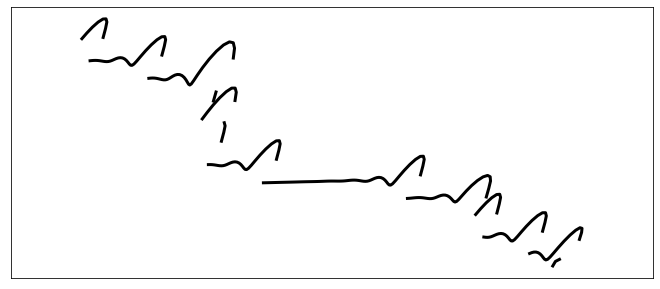

In [18]:
plot_stroke(stroke)

In [26]:
from collections import Counter


In [27]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("Training on GPU")
else:
    print("Training on CPU")

specs = ws.load_experiment_specifications(experiment_directory)


# Loading the dataset
strokes_file = "../"+specs["StrokesFile"]
sentences_file = "../"+specs["SentencesFile"]
strokes = np.load(strokes_file, allow_pickle=True)
with open(sentences_file, 'r') as f:
    sentences = f.read()

char_set = set(sentences)
char_set.remove('\n')
sentences = sentences.splitlines()

## Build a dictionary that maps chars to integers
counts = Counter(list(''.join(sentences)))
char_to_int = {char: i for i, char in enumerate(counts, 1)}

Training on GPU
